In [4]:
import pandas as pd
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file
file_path = Path('/content/drive/My Drive/Funnel.csv')
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,step,name,platform,age_range,download_dt,users_count,count_rides
0,0,download,android,18-24,2021-01-02,2,0
1,0,download,android,18-24,2021-01-04,3,0
2,0,download,android,18-24,2021-01-05,1,0
3,0,download,android,18-24,2021-01-06,1,0
4,0,download,android,18-24,2021-01-07,1,0


In [5]:
# Checking for missing values in 'age_range' column
missing_values = data['age_range'].isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100

missing_values, missing_values_percentage


(1040, 3.866027285231032)

In [14]:
import numpy as np

# Replace 'Unknown' in the 'age_range' column with NaN
data['age_range'].replace('Unknown', np.nan, inplace=True)


In [15]:
# Impute missing values using the random imputation function
data['age_range_imputed'] = data.apply(lambda row: random_impute_age_range(row, normalized_distribution), axis=1)


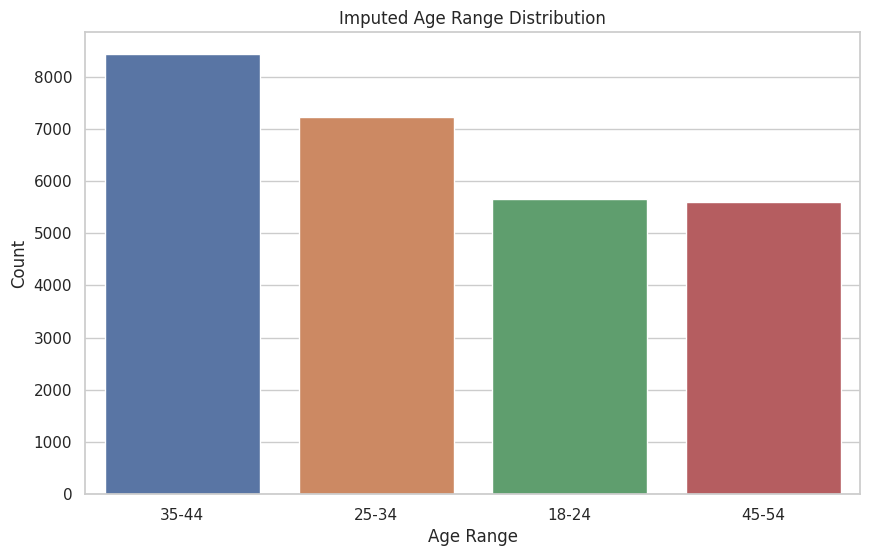

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the imputed age range distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='age_range_imputed', data=data, order=data['age_range_imputed'].value_counts().index)
plt.title('Imputed Age Range Distribution')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()
